In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
import global_values
from displaying import *
from groups import *

# rotated = np.rot90(arr, k=3)  # 1 CCW rotation = 3 CW

In [2]:
image_path = "disney_puzzle/aladin.jpg" 
# image_path = "angry.jpg"
output_folder = "fragments"
global_values.COL_NR = 12
global_values.ROW_NR = 12
fragments, tile_h, tile_w = divide_image(image_path, output_folder, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

sides_comparisons = create_sides_comparisons(fragments)



sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp



100%|██████████| 143/143 [00:02<00:00, 50.53it/s]


In [3]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]


In [ ]:
for comp in sorted_sides_comparisons:
    if comp.score < global_values.IMAGE_TH:

        anchor_fragment_idx = comp.side1.fragment_idx
        pasted_fragment_idx = comp.side2.fragment_idx
        anchor_group_idx = fragment_idx_to_group_idx[anchor_fragment_idx]
        pasted_group_idx = fragment_idx_to_group_idx[pasted_fragment_idx]

        if anchor_group_idx != pasted_group_idx:

            shifted_anchor_group, shifted_pasted_group = simulate_merge_positions(comp, groups[anchor_group_idx], groups[pasted_group_idx])

            if does_merge_fit_within_bounds(shifted_anchor_group):
                if check_groups_shapes_for_merging(shifted_anchor_group, shifted_pasted_group):
                    if check_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group):    
                        score = calculate_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group)
                        print(f"score: {score}, Comp: {comp}")

                        groups[anchor_group_idx] = merge_groups(shifted_anchor_group, shifted_pasted_group, fragment_idx_to_group_idx)
                        update_after_merge(groups, fragments, fragment_idx_to_group_idx, pasted_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 1)

# for g in groups:
#     print(g.fragment_positions)



score: 0.0026700102390006092, Comp: Sides Comp: Score=0.002670010239000609 Fragment_idx1=39, Side_idx1=1; fragment_idx2=40, side_idx2=3
score: 0.0031839299623997717, Comp: Sides Comp: Score=0.003146212442318964 Fragment_idx1=28, Side_idx1=1; fragment_idx2=29, side_idx2=3
score: 0.0036693322383003733, Comp: Sides Comp: Score=0.003669332238300372 Fragment_idx1=83, Side_idx1=2; fragment_idx2=95, side_idx2=0
score: 0.003904027680249129, Comp: Sides Comp: Score=0.003904027680249129 Fragment_idx1=56, Side_idx1=1; fragment_idx2=57, side_idx2=3
score: 0.0040921610640994545, Comp: Sides Comp: Score=0.004092161064099455 Fragment_idx1=65, Side_idx1=1; fragment_idx2=66, side_idx2=3


KeyError: 29

Merged group 2 and 6 with total score: 0.08079923134527169 using: Sides Comp: Score=0.07070741637598711 Fragment_idx1=5, Side_idx1=2; fragment_idx2=17, side_idx2=0
Merged group 16 and 23 with total score: 0.22073498388239585 using: Sides Comp: Score=0.05535602149452604 Fragment_idx1=69, Side_idx1=2; fragment_idx2=81, side_idx2=0
Merged group 2 and 10 with total score: 770387.3313377047 using: Sides Comp: Score=6.158707612946902 Fragment_idx1=39, Side_idx1=2; fragment_idx2=51, side_idx2=0
Merged group 2 and 10 with total score: 2827163426838.017 using: Sides Comp: Score=6154.084531702415 Fragment_idx1=40, Side_idx1=2; fragment_idx2=52, side_idx2=0
Merged group 16 and 17 with total score: 0.19854466721419367 using: Sides Comp: Score=0.33479951721106743 Fragment_idx1=87, Side_idx1=0; fragment_idx2=75, side_idx2=2
Merged group 2 and 1 with total score: 0.32575198703954383 using: Sides Comp: Score=0.4373778550224772 Fragment_idx1=16, Side_idx1=0; fragment_idx2=4, side_idx2=2
Merged group 36

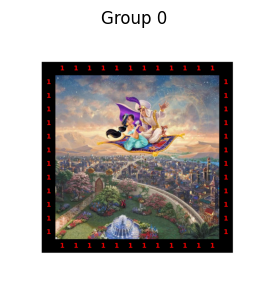

group rows: 14 cols: 14


In [ ]:
groups, fragments, fragment_idx_to_group_idx = solve_groups(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)

for g in groups:
    print(f"group rows: {g.row_nr} cols: {g.col_nr}")
